# Medical Cost Personal Insurance Project 

## Importing Packages

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt     
%matplotlib inline
import seaborn as sns
from pandas. plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings ('ignore')

## Importing Dataset

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analysis

### Checking Shape

In [17]:
data.shape

(1338, 7)

### Checking Datatypes

In [18]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking Columns

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Removing Duplicates

In [19]:
data.duplicated().sum()

1

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(1337, 7)

## Checking Unique Values

In [22]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Checking Null Values

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [24]:
data.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1337 rows x 7 columns]>

In [25]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
data.notnull().sum()

age         1337
sex         1337
bmi         1337
children    1337
smoker      1337
region      1337
charges     1337
dtype: int64

#### Null values detected

## Converting Categorical Data to Numerical Data

In [28]:
le = LabelEncoder()

In [29]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
data.sex = le.fit_transform(data.sex)
data.smoker = le.fit_transform(data.smoker)
data.region = le.fit_transform(data.region)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Analysis

### Checking Datatypes

In [31]:
data.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

## Checking Distribution

#### subplot

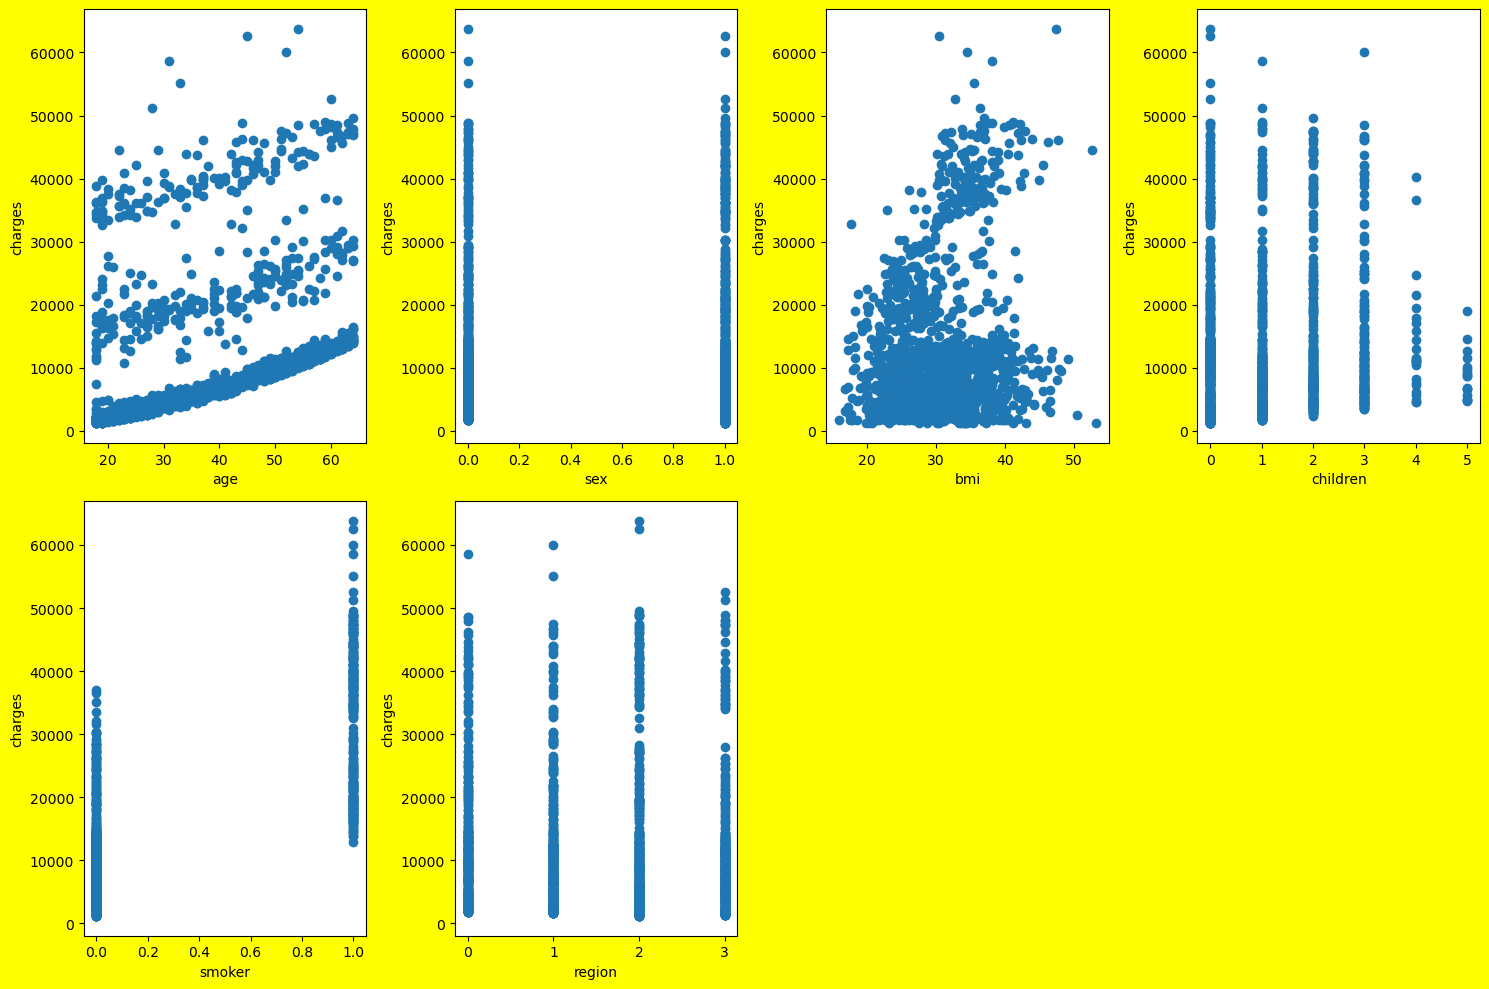

In [32]:
y = data['charges']                            
x = data.drop(columns = ['charges'])

plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8 :        
        ax = plt.subplot(2,4,plotnumber)     
        plt.scatter(x[column],y)            
        plt.xlabel(column, fontsize=10)           
        plt.ylabel('charges', fontsize=10)        
        
    plotnumber+=1     
plt.tight_layout()      

## Checking Skewness

### describe()

In [33]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### subplot

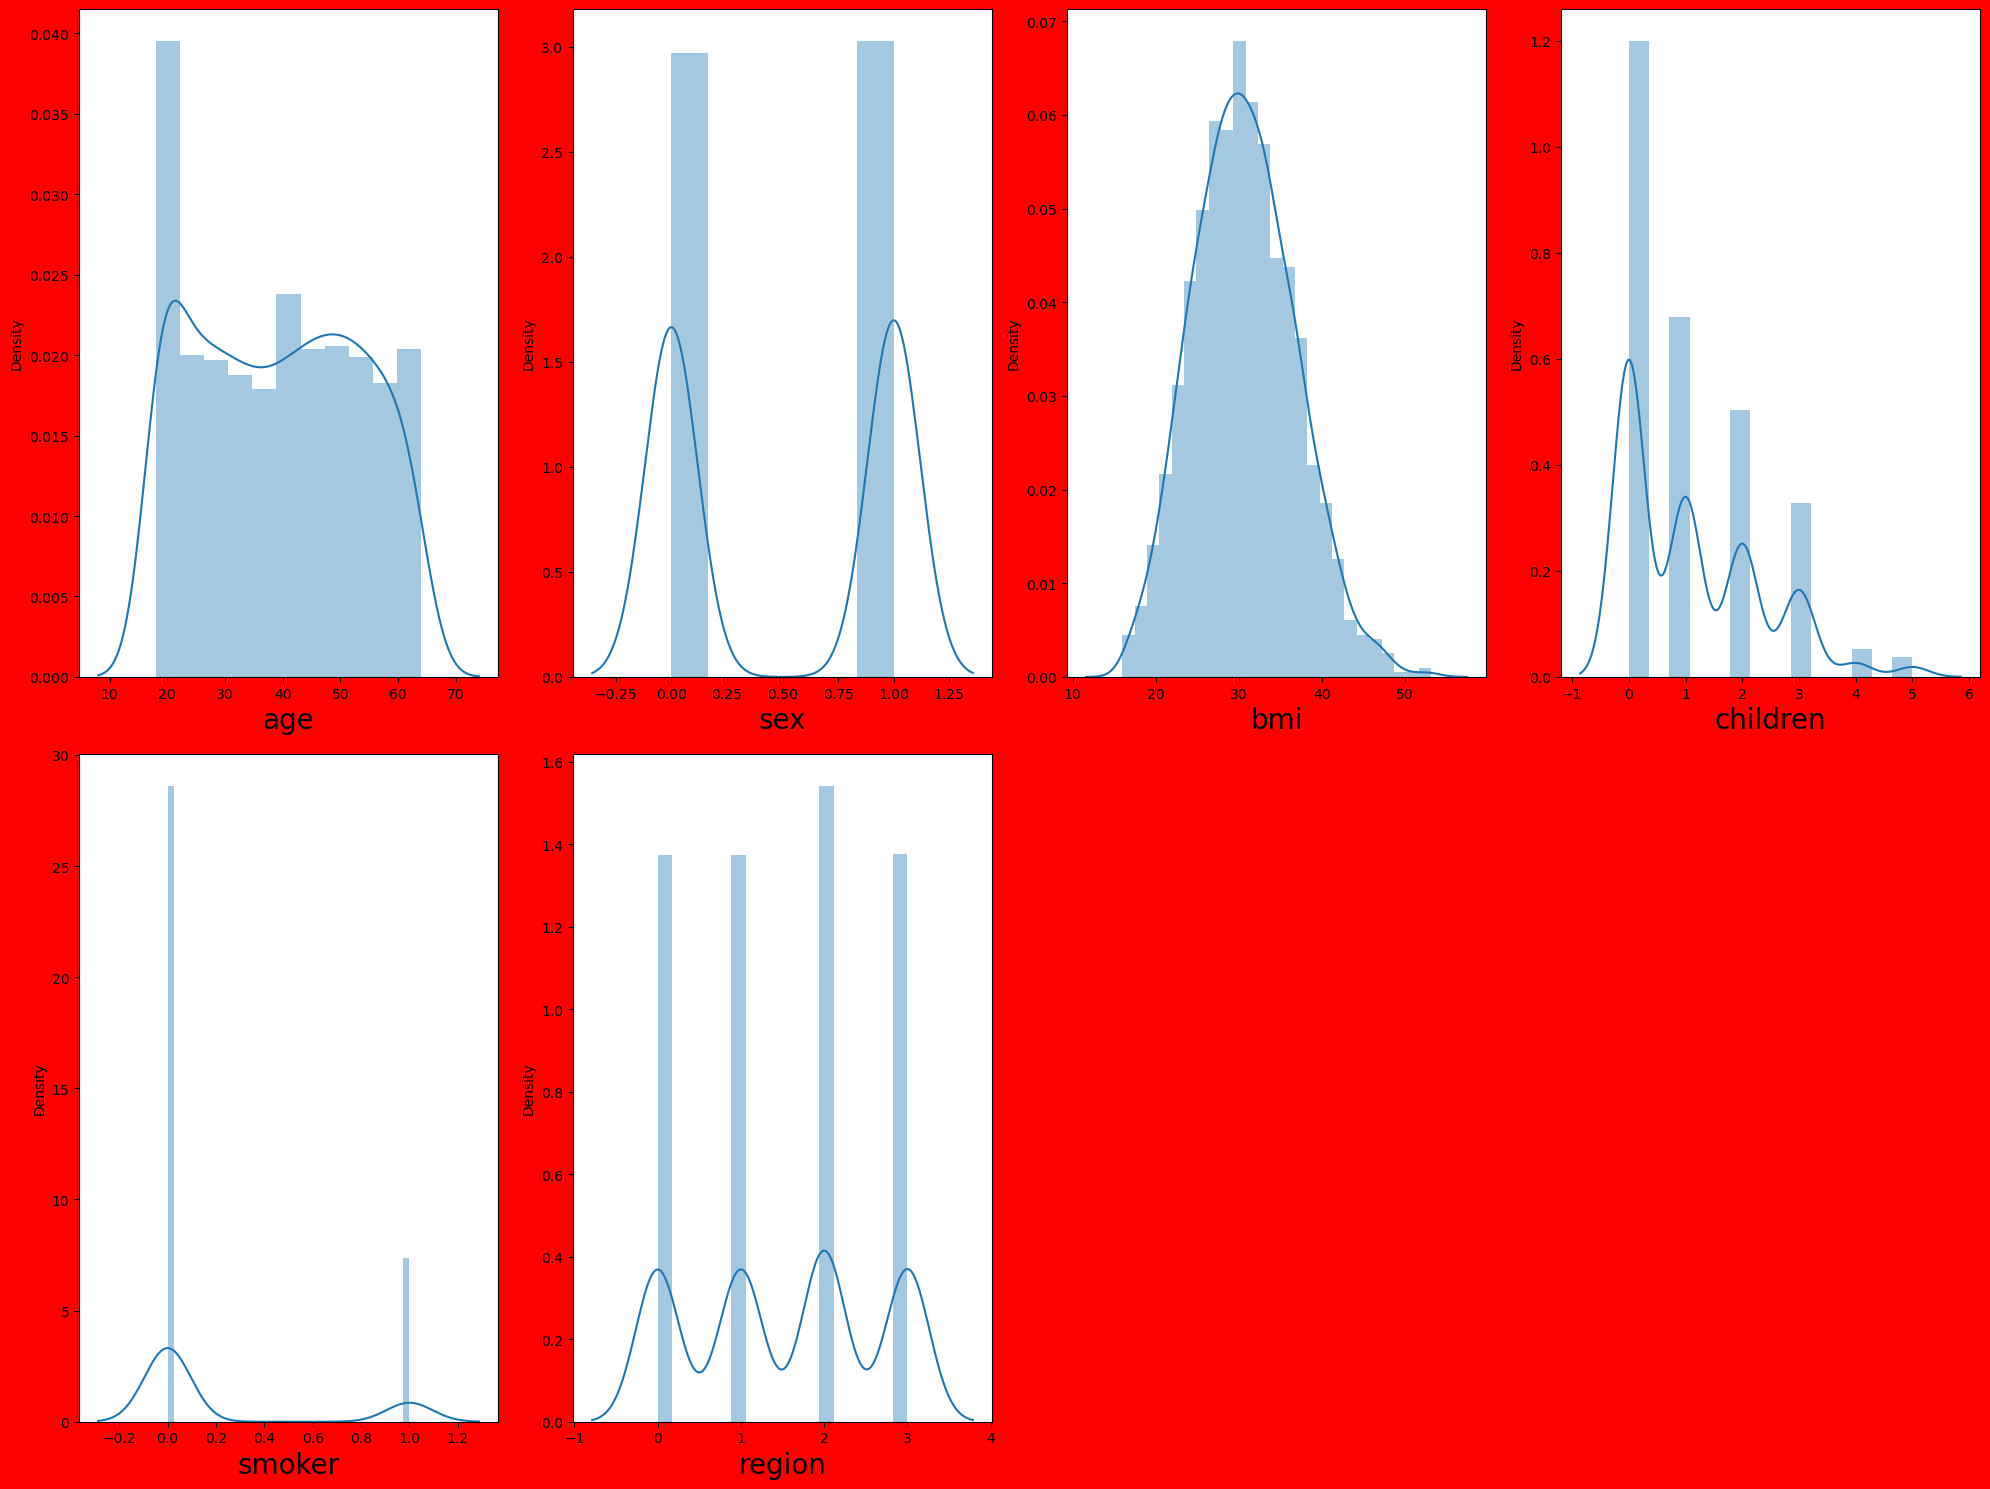

In [34]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data [['age', 'sex', 'bmi', 'children', 'smoker', 'region']]:                        
    if plotnumber<=8:                    
        ax = plt.subplot(2,4,plotnumber)   
        sns.distplot(data[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1   
plt.tight_layout()

## Checking Outliners

### boxplot

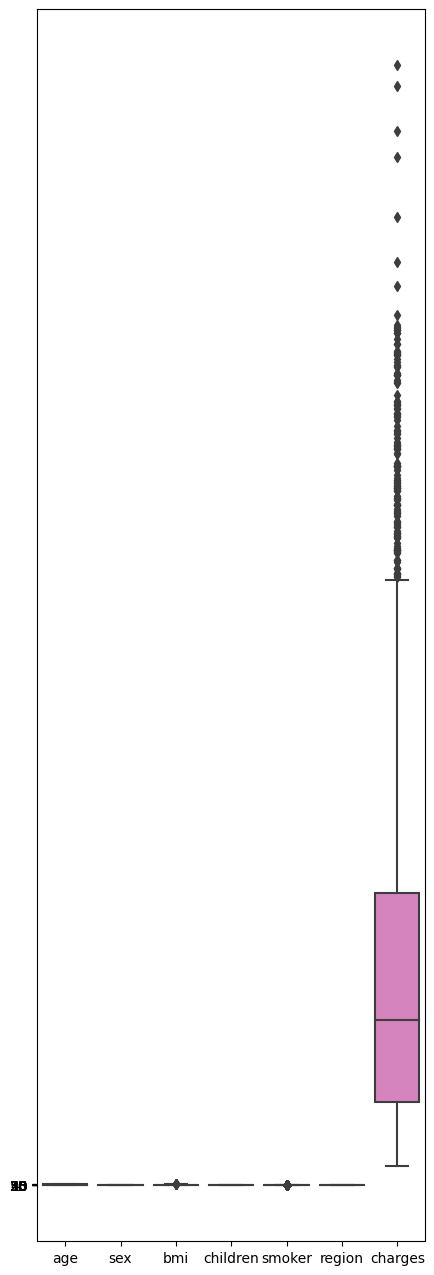

In [35]:
plt.figure(figsize=(5,16))

ax=sns.boxplot(data=data)

plt.yticks (range (5,60,5)) 

plt.show()

## Removing Outliners

In [36]:
from scipy.stats import zscore

z_score = zscore (data[['charges']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 3).all(axis=1)  
data = data[filtering_entry]

data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,39.200752,0.504511,30.633049,1.097744,0.200752,1.515038,13045.345009
std,14.052396,0.500168,6.091072,1.206108,0.400713,1.105496,11699.581595
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.250000,0.000000,26.220000,0.000000,0.000000,1.000000,4724.369462
50%,39.000000,1.000000,30.302500,1.000000,0.000000,2.000000,9303.297725
75%,51.000000,1.000000,34.600000,2.000000,0.000000,2.000000,16389.832412
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,49577.662400


In [37]:
data.shape

(1330, 7)

## Checking Multi-colinearity

### corr()

In [38]:
corr = data.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.021379,0.108408,0.042260,-0.028943,0.000023,0.303853
sex,-0.021379,1.000000,0.048938,0.016731,0.076195,0.001918,0.058287
bmi,0.108408,0.048938,1.000000,0.014859,-0.006162,0.158168,0.187123
children,0.042260,0.016731,0.014859,1.000000,0.010746,0.018084,0.076377
smoker,-0.028943,0.076195,-0.006162,0.010746,1.000000,-0.004272,0.785604
region,0.000023,0.001918,0.158168,0.018084,-0.004272,1.000000,-0.009651
charges,0.303853,0.058287,0.187123,0.076377,0.785604,-0.009651,1.000000


### heatmap

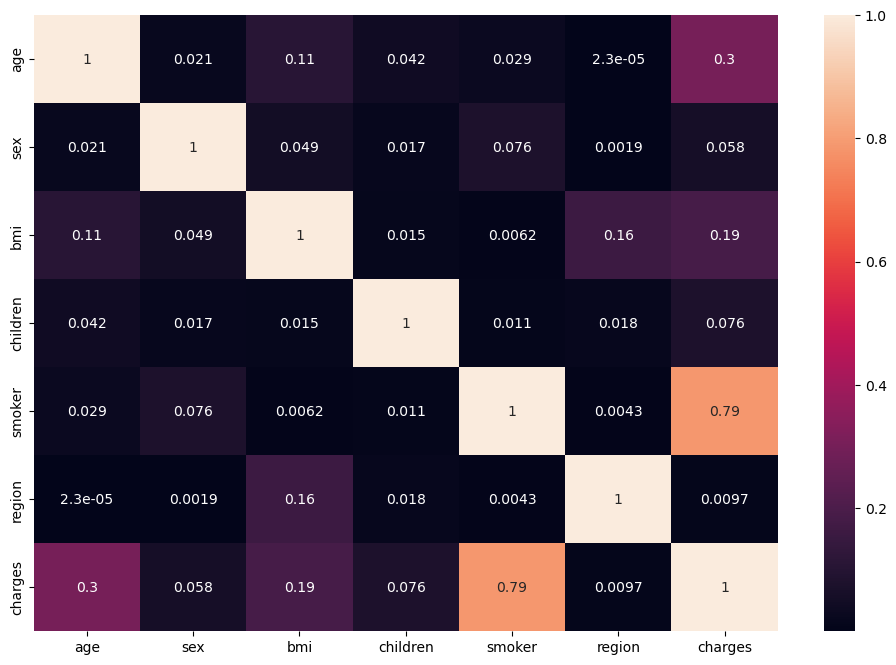

In [39]:
df_corr = data.corr().abs () # This code will get the coefficient of one variable vs all other variable

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

### Variance Inflation Factor

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,age,7.558005
1,sex,2.000028
2,bmi,10.378567
3,children,1.802019
4,smoker,1.257118
5,region,2.924245


### No Multi-colinearity found

## Separating Features & Label

In [41]:
Features = data.drop(columns=['charges'],axis=1)
Label = data.charges

In [42]:
Features

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [43]:
Features.shape

(1330, 6)

In [31]:
Label

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1330, dtype: float64

In [32]:
Label.shape

(1330,)

In [33]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Standardizing Features

In [34]:
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

In [35]:
Features_scaled

array([[-1.43807154, -1.00906363, -0.4488663 , -0.91049627,  1.99531286,
         1.34375975],
       [-1.50926055,  0.99101778,  0.51520178, -0.08107159, -0.50117454,
         0.43884812],
       [-0.79737045,  0.99101778,  0.3887397 ,  1.57777778, -0.50117454,
         0.43884812],
       ...,
       [-1.50926055, -1.00906363,  1.0210501 , -0.91049627, -0.50117454,
         0.43884812],
       [-1.29569352, -1.00906363, -0.79376288, -0.91049627, -0.50117454,
         1.34375975],
       [ 1.55186691, -1.00906363, -0.25670963, -0.91049627,  1.99531286,
        -0.46606351]])

# Creating Linear Regression model

In [36]:
reg = LinearRegression()

reg.fit(Features_scaled, Label)

LinearRegression()

### Finding Co-efficient

In [37]:
reg.coef_

array([3588.18091588,  -53.34009781, 1911.2924302 ,  621.16603458,
       9299.15626111, -386.66664815])

### Finding Intercept

In [38]:
reg.intercept_

13045.345009390225

### Checking Accuracy Score

In [39]:
print('Accuracy Score:',reg.score(Features_scaled,Label))

Accuracy Score: 0.7525704487028164


### Printing the Predicted Values

In [40]:
Charges_pred = reg.predict(Features_scaled)
print(Charges_pred)

[24550.76258223  3681.13818108  7024.24354127 ...  4239.4363533
  1187.21603628 36346.26854811]


### Finding Error Score

In [41]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 33842743.999945186
RMSE 5817.451675772235
MAE 4056.2676325125894
R2_Score 0.7525704487028164


### Predicting

In [42]:
reg.predict([[19,0,27,0,0,0]])

array([132825.67802639])

## Creating DecisionTreeRegressor model

In [44]:
from sklearn.model_selection import GridSearchCV
dr = DecisionTreeRegressor()
param_grid = {"criterion":['squared_error','absolute_error','poisson'],
              'min_samples_split': [1,2,3,4,5,6], 
              'max_depth': [1,3,5,7,9,11,12],
              }
gridsearch = GridSearchCV(estimator=dr, param_grid=param_grid)
gridsearch.fit(Features_scaled, Label)
gridsearch.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 3}

In [45]:
reg_dec = DecisionTreeRegressor(criterion='squared_error',min_samples_split=3,max_depth=5)
reg_dec.fit(Features_scaled, Label)

DecisionTreeRegressor(max_depth=5, min_samples_split=3)

### Checking Accuracy Score

In [46]:
print('Accuracy Score:',reg_dec.score(Features_scaled,Label))

Accuracy Score: 0.8782543949198619


### Printing the Predicted Values

In [47]:
Charges_pred = reg_dec.predict(Features_scaled)
print(Charges_pred)

[16674.48305882  3925.49859127  6434.83055219 ...  2593.58220508
  2593.58220508 26760.986315  ]


### Finding Error Score

In [48]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 16652034.18203199
RMSE 4080.6904050701996
MAE 2283.2099734057156
R2_Score 0.8782543949198619


### Predicting

In [49]:
reg_dec.predict([[19,0,27,0,0,0]])

array([15031.13482963])

## Creating Random Forest Regressor model

In [46]:
reg_rf = RandomForestRegressor(n_estimators=50,criterion='squared_error',min_samples_split=15,max_depth=6)

reg_rf.fit(Features_scaled, Label)

RandomForestRegressor(max_depth=6, min_samples_split=15, n_estimators=50)

### Checking Accuracy Score

In [47]:
print('Accuracy Score:',reg_rf.score(Features_scaled,Label))

Accuracy Score: 0.8940345804611393


### Printing the Predicted Values

In [49]:
Salary_pred = reg_rf.predict(Features_scaled)
print(Salary_pred)

[17482.8104921   3319.31606664  5473.15124825 ...  3045.20510398
  2454.768828   28241.24751457]


### Finding Error Score

In [50]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 16128880.732175866
RMSE 4016.0777796471853
MAE 2246.0969746649457
R2_Score 0.8899436520432669


### Predicting

In [51]:
reg_rf.predict([[19,0,27,0,0,0]])

array([17765.27167305])

## Creating KNeighbors Regressor model

In [48]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
param_grid = { 'algorithm': ['kd_tree', 'brute'],
               'leaf_size': [3,5,6,7,8],
               'n_neighbors': [3,5,7,9,11,13]
              }
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)
gridsearch.fit(Features_scaled, Label)
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 7}

In [53]:
reg_KN = KNeighborsRegressor(algorithm= 'kd_tree', leaf_size = 5, n_neighbors = 7)

reg_KN.fit(Features_scaled, Label)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=5, n_neighbors=7)

### Checking Accuracy Score

In [54]:
print('Accuracy Score:',reg_KN.score(Features_scaled,Label))

Accuracy Score: 0.8657422202309585


### Printing the Predicted Values

In [55]:
Charges_pred = reg_KN.predict(Features_scaled)
print(Charges_pred)

[24411.94929     5270.08306429  4804.65562143 ...  3529.56165
  6184.78608857 30533.94414286]


### Finding Error Score

In [56]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 19675627.598627087
RMSE 4435.721767494788
MAE 2668.2562421998077
R2_Score 0.8657422202309585


### Predicting

In [57]:
reg_KN.predict([[19,0,27,0,0,0]])

array([18594.41954429])

## Creating SVR model

In [40]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf','sigmoid']}
gridsearch = GridSearchCV(estimator=svr, param_grid=param_grid)

In [41]:
gridsearch.fit(Features_scaled, Label)
gridsearch.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [54]:
reg_SVR = SVR(C=10000, gamma= 0.1, kernel= 'rbf')

reg_SVR.fit(Features_scaled, Label)

SVR(C=10000, gamma=0.1)

### Checking Accuracy Score

In [55]:
print('Accuracy Score:',reg_SVR.score(Features_scaled,Label))

Accuracy Score: 0.8423385979327186


### Printing the Predicted Values

In [56]:
Charges_pred = reg_SVR.predict(Features_scaled)
print(Charges_pred)

[22107.38551953  1725.45068243  4449.56583911 ...  1629.73020358
  2003.57024381 32959.56776137]


### Finding Error Score

In [57]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 21564499.63580469
RMSE 4643.759213805631
MAE 1727.6528209621633
R2_Score 0.8423385979327186


### Predicting

In [58]:
reg_SVR.predict([[19,0,27,0,0,0]])

array([16949.75286993])

## Creating Lasso Regression model

In [60]:
lasscv = LassoCV(alphas = None, max_iter = 100, normalize = True)   

lasscv.fit(Features_scaled, Label)

LassoCV(max_iter=100, normalize=True)

In [61]:
alpha = lasscv.alpha_
alpha

0.7693670169392901

In [62]:
reg_lasso = Lasso(alpha)      # Passing Learning rate/speed to LASSO
reg_lasso.fit(Features_scaled,Label)

Lasso(alpha=0.7693670169392901)

### Checking Accuracy Score

In [63]:
print('Accuracy Score:',reg_lasso.score(Features_scaled,Label))

Accuracy Score: 0.7525704210381178


### Printing the Predicted Values

In [64]:
Charges_pred = reg_lasso.predict(Features_scaled)
print(Charges_pred)

[24551.42841943  3683.41433152  7024.92532405 ...  4240.1398738
  1190.21135193 36343.17377682]


### Finding Error Score

In [65]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 33842747.78384775
RMSE 5817.452000992165
MAE 4056.1717217252276
R2_Score 0.7525704210381178


### Predicting

In [66]:
reg_lasso.predict([[19,0,27,0,0,0]])

array([132789.60245355])

## Creating Ridge Regression Regularization model

In [67]:
ridgecv = RidgeCV(alphas = np.arange(1,100,10), normalize = True)
ridgecv.fit(Features_scaled, Label)

RidgeCV(alphas=array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), normalize=True)

In [68]:
alpha = ridgecv.alpha_
alpha

1

In [69]:
reg_rid = Ridge(alpha=ridgecv.alpha_)           # Passing Learning rate/speed to Ridge
reg_rid.fit(Features_scaled, Label)

Ridge(alpha=1)

### Checking Accuracy Score

In [70]:
print('Accuracy Score:',reg_rid.score(Features_scaled,Label))

Accuracy Score: 0.7525700158126669


### Printing the Predicted Values

In [71]:
Charges_pred = reg_rid.predict(Features_scaled)
print(Charges_pred)

[24541.36372347  3688.9875479   7029.85101178 ...  4245.68547122
  1195.62841162 36327.59071004]


### Finding Error Score

In [72]:
 mse = mean_squared_error(Label,Charges_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(Label,Charges_pred))
print('RMSE',rmse)

mae = mean_absolute_error(Label,Charges_pred)
print('MAE',mae)

r2s = r2_score(Label,Charges_pred)
print('R2_Score',r2s)

MSE 33842803.209487595
RMSE 5817.456764728689
MAE 4057.1488932594907
R2_Score 0.7525700158126669


### Predicting

In [73]:
reg_rid.predict([[19,0,27,0,0,0]])

array([132739.04054194])